In [ ]:
from google.colab import files
files.upload()  # Manually upload kaggle.json when prompted


Saving kaggleee.json to kaggleee.json


{'kaggleee.json': b'{"username":"ishikagupta03","key":"159d8667c77c4229f7e42e5c7a441886"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset
!unzip melanoma-cancer-dataset.zip -d melanoma_data


Streaming output truncated to the last 5000 lines.
  inflating: melanoma_data/train/Malignant/1530.jpg  
  inflating: melanoma_data/train/Malignant/1531.jpg  
  inflating: melanoma_data/train/Malignant/1532.jpg  
  inflating: melanoma_data/train/Malignant/1533.jpg  
  inflating: melanoma_data/train/Malignant/1534.jpg  
  inflating: melanoma_data/train/Malignant/1535.jpg  
  inflating: melanoma_data/train/Malignant/1536.jpg  
  inflating: melanoma_data/train/Malignant/1537.jpg  
  inflating: melanoma_data/train/Malignant/1538.jpg  
  inflating: melanoma_data/train/Malignant/1539.jpg  
  inflating: melanoma_data/train/Malignant/154.jpg  
  inflating: melanoma_data/train/Malignant/1540.jpg  
  inflating: melanoma_data/train/Malignant/1541.jpg  
  inflating: melanoma_data/train/Malignant/1542.jpg  
  inflating: melanoma_data/train/Malignant/1543.jpg  
  inflating: melanoma_data/train/Malignant/1544.jpg  
  inflating: melanoma_data/train/Malignant/1545.jpg  
  inflating: melanoma_data/train

In [ ]:
import os
print(os.listdir("melanoma_data"))


['train', 'test']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Use "train" directory for both training and validation
train_generator = train_datagen.flow_from_directory(
    "melanoma_data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"  # 80% Training
)

val_generator = val_datagen.flow_from_directory(
    "melanoma_data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"  # 20% Validation
)


Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load VGG-16 without top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier layers
x = Flatten()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dense(1, activation="sigmoid")(x)  # Binary classification

# Define final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.3).astype(int)  # Lower the threshold from 0.5 to 0.3


NameError: name 'test_generator' is not defined

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,  # Reduce rotation
    zoom_range=0.1      # Reduce zoom effect
)


In [ ]:
import numpy as np
print(np.bincount(train_generator.classes))  # Check class distribution


[5032 4472]


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Load VGG16 base model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers (optional: unfreeze later for fine-tuning)
for layer in vgg_base.layers:
    layer.trainable = False


In [ ]:
# Start building the model on top of the VGG16 base
x = vgg_base.output

# Option 1: Global Average Pooling (preferred over Flatten sometimes)
x = GlobalAveragePooling2D()(x)

# Option 2: Or use Flatten if you prefer
# x = Flatten()(x)

# Fully connected layers with L2 regularization and Dropout
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)

# Another dense layer (optional)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)

# Output layer (binary classification example)
outputs = Dense(1, activation='sigmoid')(x)

# Build the full model
model = Model(inputs=vgg_base.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 64s 215ms/step - accuracy: 0.6614 - loss: 4.1845 - val_accuracy: 0.7196 - val_loss: 2.3715
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 63s 211ms/step - accuracy: 0.7551 - loss: 2.0523 - val_accuracy: 0.7512 - val_loss: 1.4158
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 62s 209ms/step - accuracy: 0.7971 - loss: 1.2653 - val_accuracy: 0.7629 - val_loss: 1.0634
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 62s 209ms/step - accuracy: 0.8076 - loss: 0.9596 - val_accuracy: 0.7613 - val_loss: 0.9102
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 62s 209ms/step - accuracy: 0.8181 - loss: 0.8115 - val_accuracy: 0.7537 - val_loss: 0.8347
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 62s 210ms/step - accuracy: 0.8298 - loss: 0.7160 - val_accuracy: 0.7629 - val_loss: 0.7630
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 62s 209ms/step - accuracy: 0.8282 - loss: 0.6570 - val_accuracy: 0.7663 - val_loss: 0.7117
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 70s 236ms/step - accuracy: 0.8428 - loss: 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Point to your test dataset directory
test_generator = test_datagen.flow_from_directory(
    '/content/melanoma_data/test',          # 🔴 Replace this with your folder path!
    target_size=(224, 224),       # Same target size you used for training
    batch_size=32,
    class_mode='binary',          # Or 'categorical' depending on your problem
    shuffle=False                 # Don't shuffle if you want labels aligned with predictions
)


Found 2000 images belonging to 2 classes.


In [ ]:
y_pred_prob = model.predict(test_generator)

# Binary classification threshold (0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# View prediction counts
import numpy as np
print(np.unique(y_pred, return_counts=True))


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step
(array([0, 1]), array([1190,  810]))


In [ ]:
model.save("vgg_melanoma_model.h5")  # Save model in the current Colab session


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model (since it's already in the Colab session)
model = load_model("vgg_melanoma_model.h5")


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy:.4f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.8909 - loss: 0.3565
Test Accuracy: 0.8200


In [ ]:
train_loss, train_acc = model.evaluate(train_generator)


print(f"Train Accuracy: {train_acc * 100:.2f}%")



297/297 ━━━━━━━━━━━━━━━━━━━━ 52s 176ms/step - accuracy: 0.8726 - loss: 0.3811
Train Accuracy: 87.05%


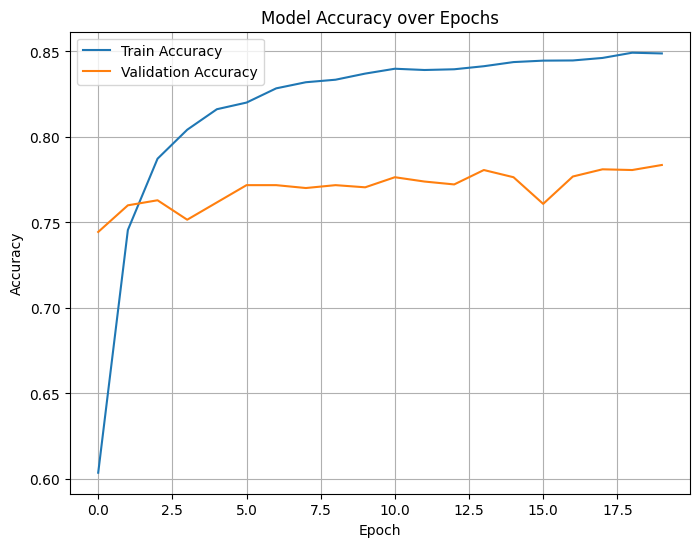

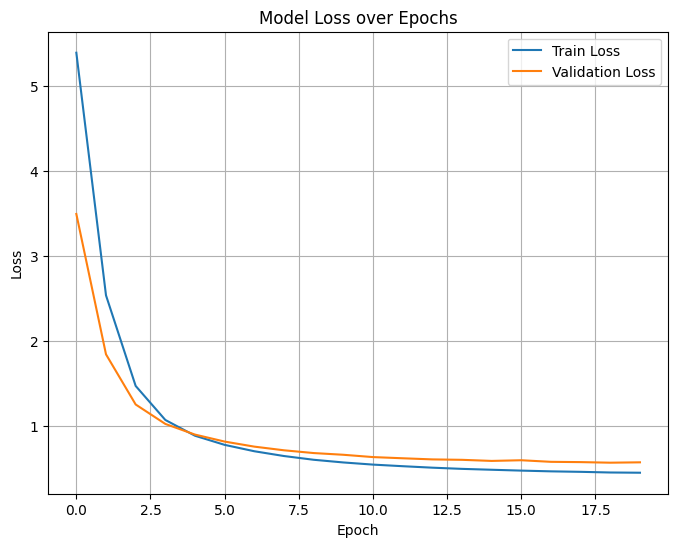

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step
              precision    recall  f1-score   support

      Benign       0.77      0.92      0.84      1000
   Malignant       0.90      0.72      0.80      1000

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



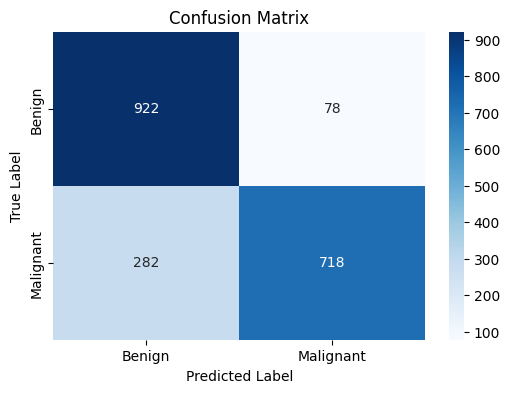

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get predictions from the model
predictions = model.predict(test_generator)  # or val_generator, depending on what you want to check

# 2. Convert probabilities to class labels (assuming binary classification)
predicted_classes = (predictions > 0.5).astype('int32').flatten()

# 3. Get true labels from the generator
true_classes = test_generator.classes  # or val_generator.classes
class_labels = list(test_generator.class_indices.keys())  # for label names

# 4. Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# 5. Plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step


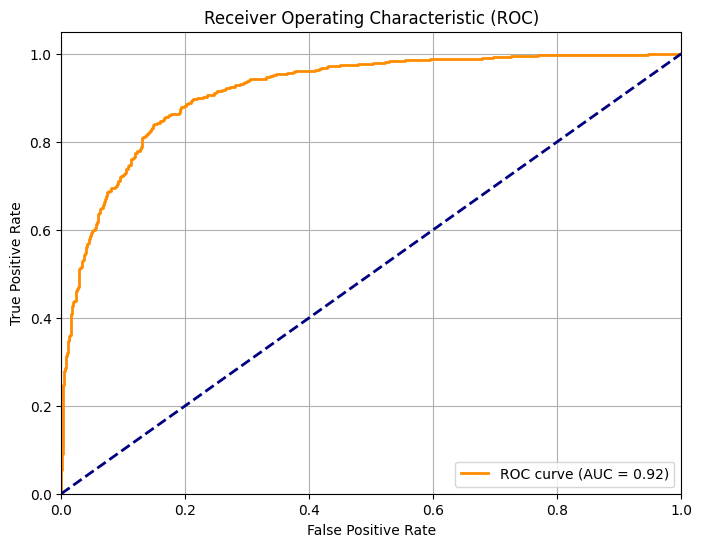

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get the predicted probabilities
y_pred_prob = model.predict(test_generator)  # Use test_generator or val_generator

# 2. Get true labels
y_true = test_generator.classes  # Make sure test_generator has shuffle=False!

# 3. Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# 4. Calculate Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step


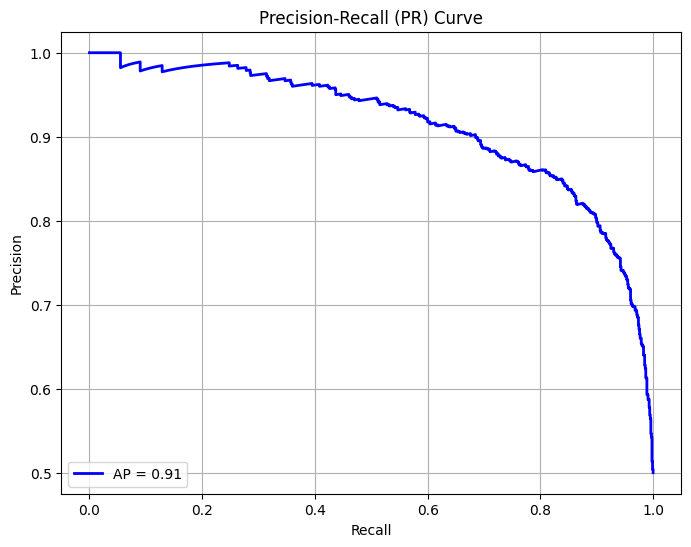

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Predict probabilities on the test set
y_pred_prob = model.predict(test_generator)

# 2. Get true labels
y_true = test_generator.classes  # Ensure test_generator.shuffle = False when created!

# 3. Compute precision-recall pairs and thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)

# 4. Compute Average Precision (AP)
average_precision = average_precision_score(y_true, y_pred_prob)

# 5. Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=679178053866ea50064198152967479c553fdeabba075905780e244350799918
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
pip install lime


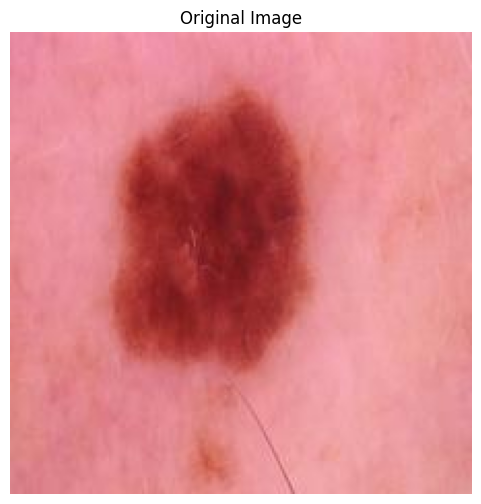

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━

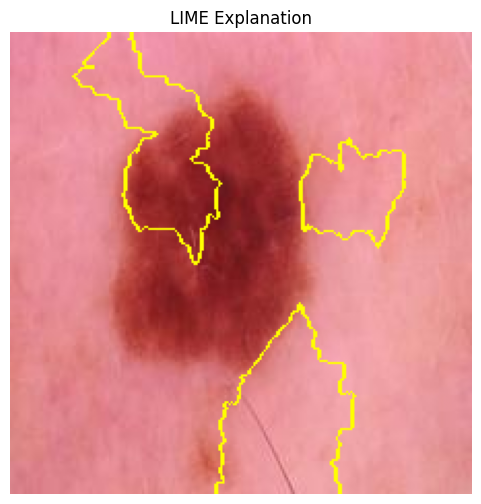

In [ ]:
# Install LIME if you haven't already
# pip install lime

import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

# Step 1: Load your model
# You can replace this with your own trained model
model = VGG16(weights='imagenet')

# Step 2: Load and preprocess your image
img_path = '/content/melanoma_data/train/Benign/1008.jpg'  # <<=== PUT YOUR IMAGE PATH HERE

# Load the image and resize it to (224, 224) for VGG16
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to numpy array
img_array = image.img_to_array(img)

# Make a copy for displaying (uint8 format)
img_display = img_array.astype('uint8')

# Preprocess the image for model prediction
img_preprocessed = preprocess_input(img_array.copy())

# Add batch dimension (model expects batches)
img_preprocessed = np.expand_dims(img_preprocessed, axis=0)

# Step 3: Show the original image
plt.figure(figsize=(6, 6))
plt.imshow(img_display.astype('uint8'))
plt.axis('off')
plt.title('Original Image')
plt.show()

# Step 4: Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Step 5: Run LIME explanation
explanation = explainer.explain_instance(
    image=img_display,               # The original image, NOT preprocessed
    classifier_fn=model.predict,     # Model's predict function
    top_labels=5,                    # Explain top 5 predicted labels
    hide_color=0,                    # Background color for masked areas
    num_samples=1000                 # Number of perturbations to generate
)

# Step 6: Get the explanation mask for the top class
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],   # The top predicted class
    positive_only=True,                # Show only the positive contributing pixels
    hide_rest=False,                   # Don't hide the non-important parts
    num_features=5,                    # Number of superpixels to highlight
    min_weight=0.0                     # Minimum weight for displaying
)

# Step 7: Show the LIME explanation
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp / 255.0, mask))  # temp is RGB, so scale it to 0-1 for display
plt.axis('off')
plt.title('LIME Explanation')
plt.show()


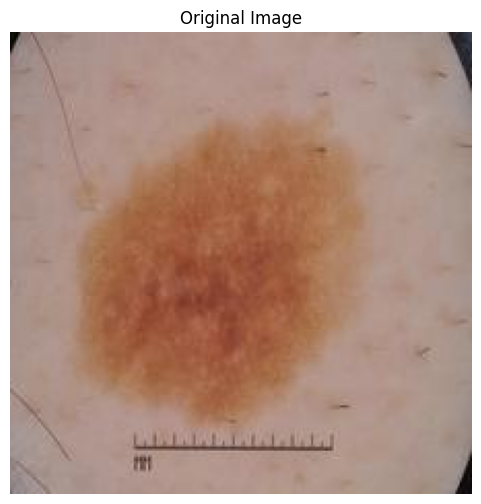

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/s

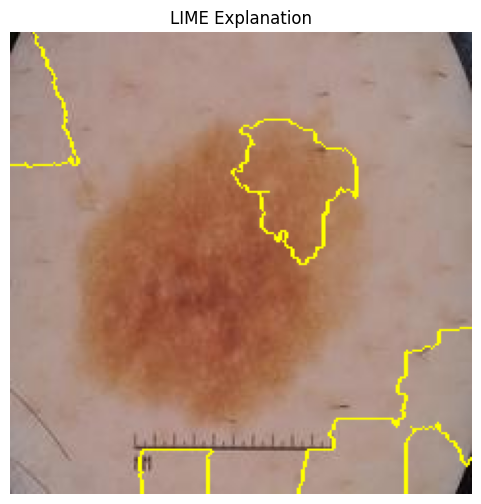

In [ ]:
# Install LIME if you haven't already
# pip install lime

import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

# Step 1: Load your model
# You can replace this with your own trained model
model = VGG16(weights='imagenet')

# Step 2: Load and preprocess your image
img_path = '/content/melanoma_data/train/Malignant/1005.jpg'  # <<=== PUT YOUR IMAGE PATH HERE

# Load the image and resize it to (224, 224) for VGG16
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to numpy array
img_array = image.img_to_array(img)

# Make a copy for displaying (uint8 format)
img_display = img_array.astype('uint8')

# Preprocess the image for model prediction
img_preprocessed = preprocess_input(img_array.copy())

# Add batch dimension (model expects batches)
img_preprocessed = np.expand_dims(img_preprocessed, axis=0)

# Step 3: Show the original image
plt.figure(figsize=(6, 6))
plt.imshow(img_display.astype('uint8'))
plt.axis('off')
plt.title('Original Image')
plt.show()

# Step 4: Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Step 5: Run LIME explanation
explanation = explainer.explain_instance(
    image=img_display,               # The original image, NOT preprocessed
    classifier_fn=model.predict,     # Model's predict function
    top_labels=5,                    # Explain top 5 predicted labels
    hide_color=0,                    # Background color for masked areas
    num_samples=1000                 # Number of perturbations to generate
)

# Step 6: Get the explanation mask for the top class
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],   # The top predicted class
    positive_only=True,                # Show only the positive contributing pixels
    hide_rest=False,                   # Don't hide the non-important parts
    num_features=5,                    # Number of superpixels to highlight
    min_weight=0.0                     # Minimum weight for displaying
)

# Step 7: Show the LIME explanation
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp / 255.0, mask))  # temp is RGB, so scale it to 0-1 for display
plt.axis('off')
plt.title('LIME Explanation')
plt.show()


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted: [('n02112137', 'chow', np.float32(0.67795277))]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_203']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


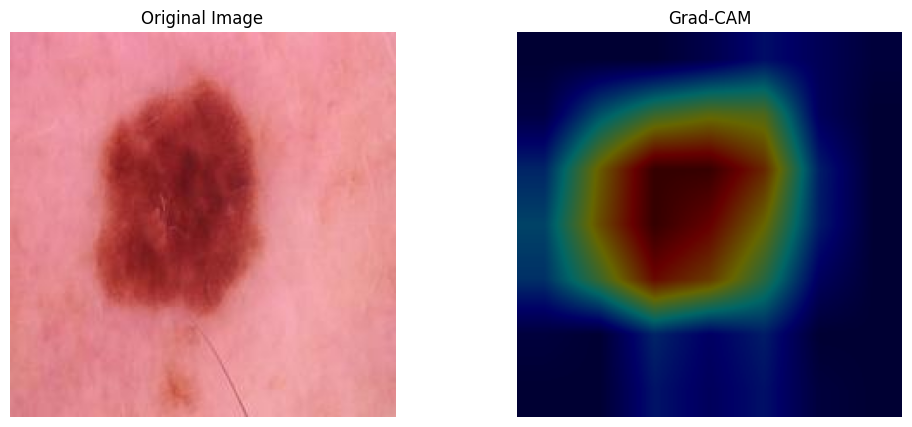

In [ ]:
# ------------------ IMPORTS ------------------
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# ------------------ DISPLAY FUNCTION ------------------
def display_gradcam(original_img, gradcam_img):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_img)
    plt.title("Grad-CAM")
    plt.axis('off')

    plt.show()

# ------------------ LOAD MODEL ------------------
model = MobileNetV2(weights='imagenet')
model.summary()  # Optional: to see layer names

# ------------------ LOAD AND PREPROCESS IMAGE ------------------
img_path = '/content/melanoma_data/train/Benign/1008.jpg'  # <-- Replace with your image path!
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

# ------------------ PREDICT ------------------
predictions = model.predict(img_preprocessed)
predicted_class_index = np.argmax(predictions[0])

print("Predicted:", decode_predictions(predictions, top=1)[0])

# ------------------ GRAD-CAM FUNCTION ------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Global average pooling to get importance
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# ------------------ GENERATE HEATMAP ------------------
last_conv_layer_name = 'Conv_1'  # MobileNetV2
heatmap = make_gradcam_heatmap(img_preprocessed, model, last_conv_layer_name)

# ------------------ SUPERIMPOSE HEATMAP ------------------
def superimpose_heatmap(heatmap, img_array, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)

    img_bgr = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2BGR)
    superimposed_img = cv2.addWeighted(heatmap_colored, alpha, img_bgr, 1 - alpha, 0)

    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    return superimposed_img_rgb

gradcam_img = superimpose_heatmap(heatmap, img_array)

# ------------------ DISPLAY ORIGINAL & GRADCAM ------------------
display_gradcam(img, gradcam_img)


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: [('n07875152', 'potpie', np.float32(0.09677505))]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_515']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


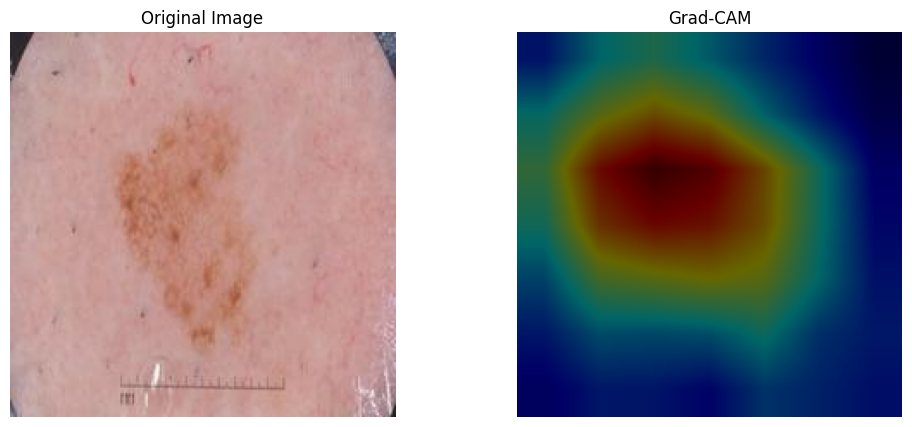

In [ ]:
# ------------------ IMPORTS ------------------
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# ------------------ DISPLAY FUNCTION ------------------
def display_gradcam(original_img, gradcam_img):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_img)
    plt.title("Grad-CAM")
    plt.axis('off')

    plt.show()

# ------------------ LOAD MODEL ------------------
model = MobileNetV2(weights='imagenet')
model.summary()  # Optional: to see layer names

# ------------------ LOAD AND PREPROCESS IMAGE ------------------
img_path = '/content/melanoma_data/train/Malignant/1082.jpg'  # <-- Replace with your image path!
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

# ------------------ PREDICT ------------------
predictions = model.predict(img_preprocessed)
predicted_class_index = np.argmax(predictions[0])

print("Predicted:", decode_predictions(predictions, top=1)[0])

# ------------------ GRAD-CAM FUNCTION ------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Global average pooling to get importance
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# ------------------ GENERATE HEATMAP ------------------
last_conv_layer_name = 'Conv_1'  # MobileNetV2
heatmap = make_gradcam_heatmap(img_preprocessed, model, last_conv_layer_name)

# ------------------ SUPERIMPOSE HEATMAP ------------------
def superimpose_heatmap(heatmap, img_array, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)

    img_bgr = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2BGR)
    superimposed_img = cv2.addWeighted(heatmap_colored, alpha, img_bgr, 1 - alpha, 0)

    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    return superimposed_img_rgb

gradcam_img = superimpose_heatmap(heatmap, img_array)

# ------------------ DISPLAY ORIGINAL & GRADCAM ------------------
display_gradcam(img, gradcam_img)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load an image (update the path)
image_path = "/content/melanoma_data/train/Malignant/1004.jpg"  # Change to an actual image from your dataset
image = load_img(image_path, target_size=(224, 224))

# Preprocess image
image = img_to_array(image) / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Predict using the model
prediction = model.predict(image)[0][0]  # Get the first (only) prediction
print(f"Raw Prediction Value: {prediction}")

# Check the output classification
result = "Malignant" if prediction > 0.5 else "Benign"
print(f"Prediction Result: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Raw Prediction Value: 0.24097442626953125
Prediction Result: Benign
